Assignment 3: Final Project
Dataset Selection

For this project, I selected the Traffic Volumes – Midblock Vehicle Speed, Volume, and Classification Counts dataset from the City of Toronto’s Open Data Portal. This dataset contains information on vehicle speed, volume, and classification across various midblock locations in Toronto. 

https://open.toronto.ca/dataset/traffic-volumes-midblock-vehicle-speed-volume-and-classification-counts/


Visualization 1: Traffic Volume Trends Over Time

1. Software Used:

Python (Matplotlib and Seaborn)

2. Intended Audience:

A. City Planners & Traffic Engineers who need to identify speed trends and areas where traffic-calming measures may be required.
B. General Public interested in understanding speeding patterns across Toronto.

3. Key Message:

This visualization demonstrates how average vehicle speeds and total traffic volumes vary over time. By focusing on trends in daily or monthly intervals, stakeholders can spot potential congestion patterns or speeding issues.

4. Design Principles:

A. Substantive: 
I filtered and aggregated the dataset to focus on meaningful patterns in average speeds and total volumes.
B. Aesthetic: 
I applied a simple colour scheme (e.g., one primary color) and used a clean layout, ensuring the plot remains visually appealing without unnecessary clutter.

5. Ensuring Reproducibility:

All data cleaning, processing, and plotting steps are well docomented in the code.

6. Accessibility:

A. I used high-contrast colours for lines and markers.
B. Clear axis labels and titles make the chart comprehensible.
C. Descriptive text (or alt text) can accompany the plot to assist screen readers.

7. Impacted Communities:

A. Residents and drivers can use these insights to anticipate high-traffic or high-speed areas.
B. Policy makers may use the data to inform road safety measures, congestion management, and infrastructure planning.

8. Data Inclusion/Exclusion:

I focused on date, speed, and location columns, excluding fields unrelated to speed trends. I also dropped rows with essential missing values to ensure data integrity.

9. Underwater Labour:

A. Cleaning and preprocessing large volumes of raw data.
B. Deciding the color scheme, labels, and layout for clarity.
C. Calculating weighted average speeds from multiple speed-range columns.

Appendix:
1. Appendix1 Toronto Traﬃc Trends python code


In [4]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

        id  count_id                                  location_name  \
0  3993624   2825202  Avon Ave: York Stadium Trl - Ln W Avon S Avon   
1  3993625   2825202  Avon Ave: York Stadium Trl - Ln W Avon S Avon   
2  3993626   2825202  Avon Ave: York Stadium Trl - Ln W Avon S Avon   
3  3993627   2825202  Avon Ave: York Stadium Trl - Ln W Avon S Avon   
4  3993628   2825202  Avon Ave: York Stadium Trl - Ln W Avon S Avon   

   longitude  latitude  centreline_id           time_start  \
0 -79.478365  43.68125       30102813  2020-01-14 00:00:00   
1 -79.478365  43.68125       30102813  2020-01-14 00:15:00   
2 -79.478365  43.68125       30102813  2020-01-14 00:30:00   
3 -79.478365  43.68125       30102813  2020-01-14 00:45:00   
4 -79.478365  43.68125       30102813  2020-01-14 01:00:00   

              time_end direction  vol_1_19kph  ...  vol_36_40kph  \
0  2020-01-14 00:15:00        NB            0  ...             1   
1  2020-01-14 00:30:00        NB            0  ...             0

/var/folders/c9/s8cbdktx3wzf0tv1gf80lkpr0000gn/T/ipykernel_10555/2416055031.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['Average_Speed'] = df.groupby("Date").apply(calculate_weighted_avg_speed).reset_index(level=0, drop=True)


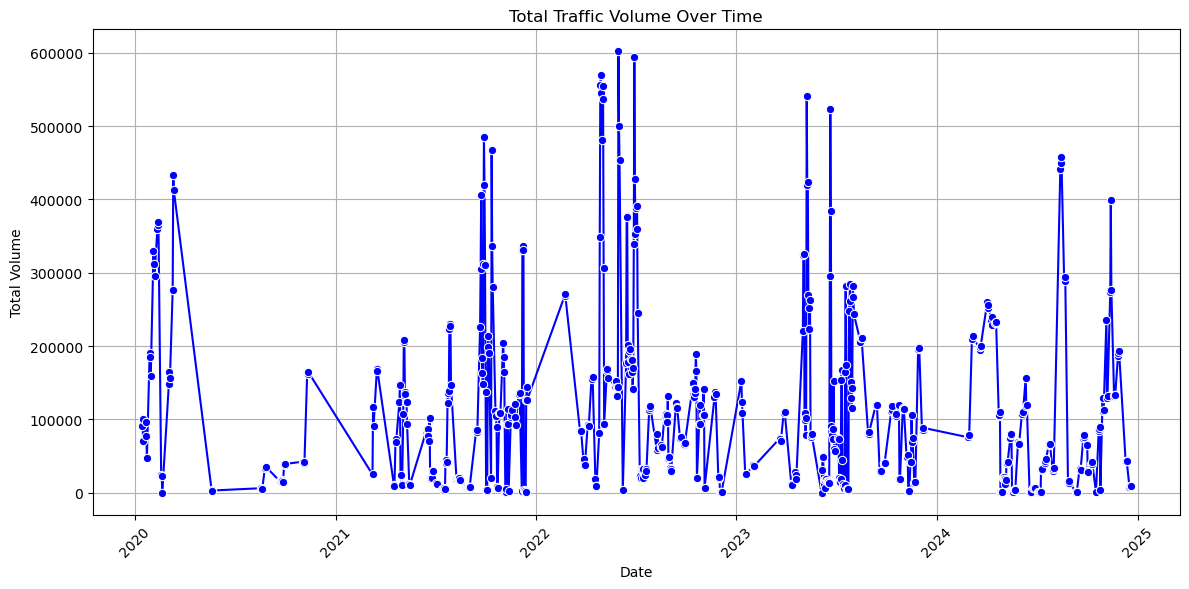

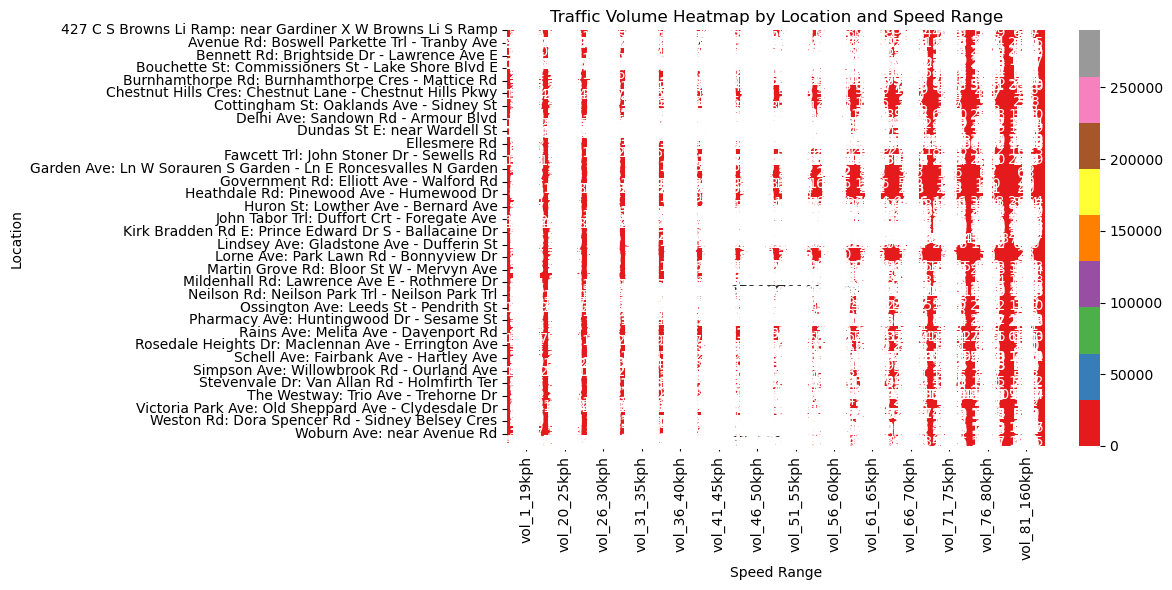

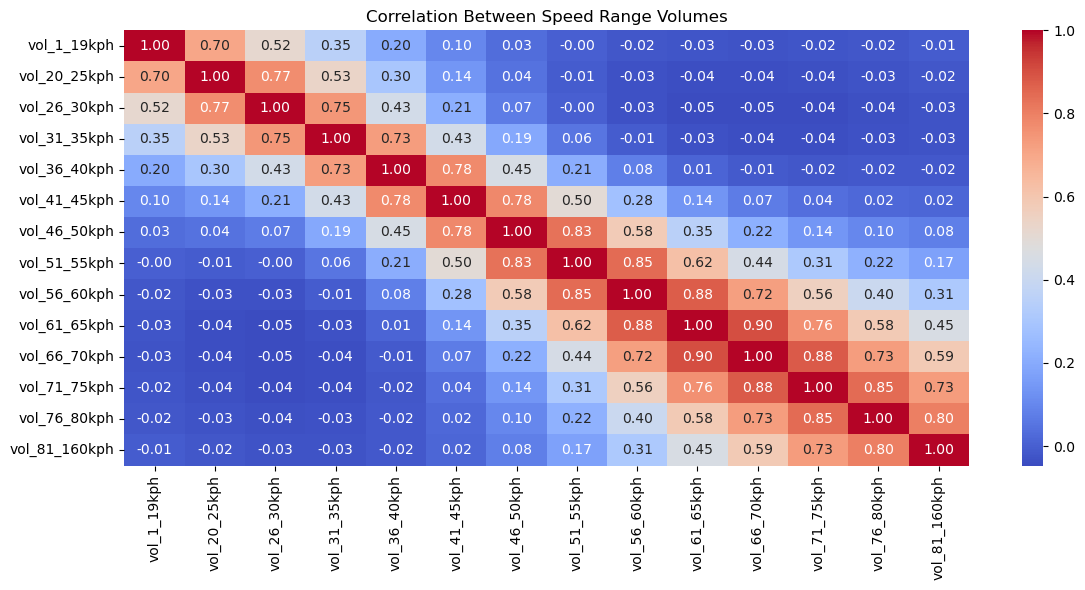

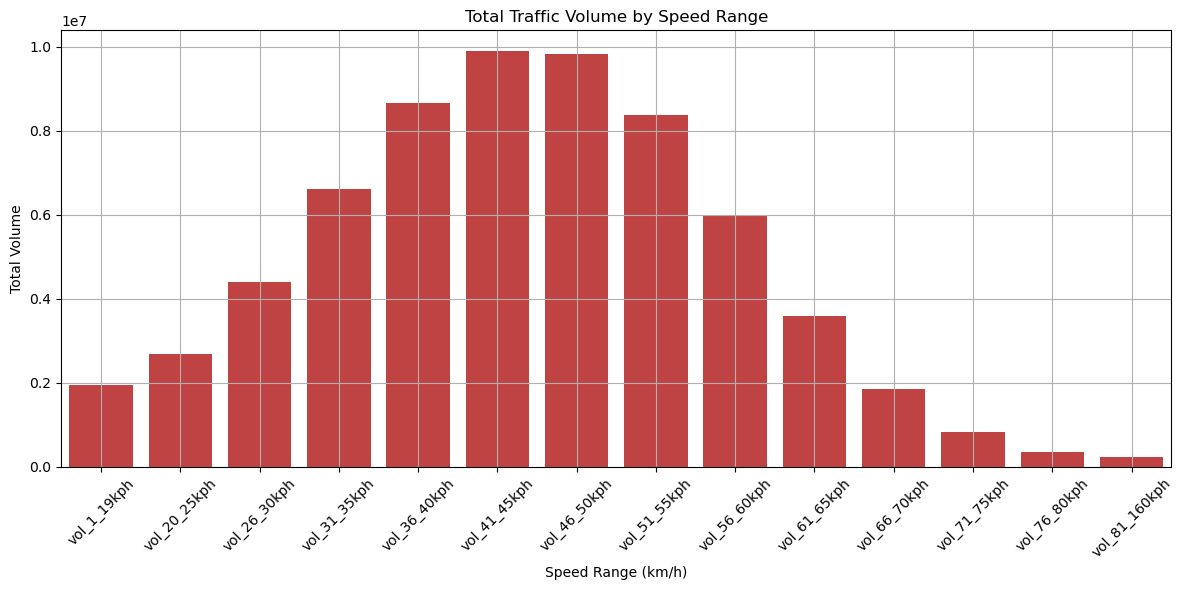

In [5]:
# Load the Dataset
file_path = '/users/sueomar/visualization/02_activities/assignments/assignment-3/data/data_speed_2020_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Get dataset information
df.info()

# Clean data
print(df.isnull().sum())
df = df.dropna(subset=["count_id", "time_start", "time_end", "direction", "location_name"])

# Define the speed range midpoints
speed_ranges = {
    'vol_1_19kph': (1 + 19) / 2,
    'vol_20_25kph': (20 + 25) / 2,
    'vol_26_30kph': (26 + 30) / 2,
    'vol_31_35kph': (31 + 35) / 2,
    'vol_36_40kph': (36 + 40) / 2,
    'vol_41_45kph': (41 + 45) / 2,
    'vol_46_50kph': (46 + 50) / 2,
    'vol_51_55kph': (51 + 55) / 2,
    'vol_56_60kph': (56 + 60) / 2,
    'vol_61_65kph': (61 + 65) / 2,
    'vol_66_70kph': (66 + 70) / 2,
    'vol_71_75kph': (71 + 75) / 2,
    'vol_76_80kph': (76 + 80) / 2,
    'vol_81_160kph': (81 + 160) / 2
}

speed_midpoints = list(speed_ranges.values())
volume_columns = list(speed_ranges.keys())

# Convert the 'time_start' column to datetime format
df['time_start'] = pd.to_datetime(df['time_start'], errors='coerce')
df['Date'] = df['time_start'].dt.date

# Weighted average speed function
def calculate_weighted_avg_speed(group):
    weighted_sum = (group[volume_columns] * speed_midpoints).sum(axis=1)
    total_volume = group[volume_columns].sum(axis=1)
    return (weighted_sum / total_volume).mean()

df['Average_Speed'] = df.groupby("Date").apply(calculate_weighted_avg_speed).reset_index(level=0, drop=True)

# Total Volume over time
df['Total_Volume'] = df[volume_columns].sum(axis=1)
total_volume_over_time = df.groupby('Date')['Total_Volume'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_volume_over_time, x='Date', y='Total_Volume', marker="o", color="b")
plt.title("Total Traffic Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Volume pivot table for heatmap
volume_pivot = df[volume_columns + ['location_name']].groupby('location_name').sum()

plt.figure(figsize=(12, 6))
sns.heatmap(volume_pivot, annot=True, cmap="Set1", fmt="g", cbar=True)
plt.title("Traffic Volume Heatmap by Location and Speed Range")
plt.xlabel("Speed Range")
plt.ylabel("Location")
plt.tight_layout()
plt.show()

# Correlation between speed range volumes
correlation_matrix = df[volume_columns].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Between Speed Range Volumes")
plt.tight_layout()
plt.show()

# Sum of volumes for each speed range (Bar Plot)
total_volumes = df[volume_columns].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=total_volumes.index, y=total_volumes.values, color="#D32F2F")
plt.title("Total Traffic Volume by Speed Range")
plt.xlabel("Speed Range (km/h)")
plt.ylabel("Total Volume")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Save cleaned data
directory = "data"
df.to_csv(os.path.join(directory, "cleaned_traffic_data.csv"), index=False)
